In [2]:
# import important packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# Read the comma separated data into X and Y

data = pd.read_csv('ex1data1.txt').to_numpy()

#x0 = np.ones((data.shape[0], 1))
X = (data[:, 0]).reshape(data.shape[0], 1)
#X = np.concatenate((x0, x1), axis=1)
Y = data[:, 1].reshape(data.shape[0], 1)

In [4]:
# Summary of dataset

shape_X = X.shape
shape_Y = Y.shape
m = Y.shape[0]

print("The shape of X is: {}".format(shape_X))
print("The shape of Y is: {}".format(shape_Y))
print("There are {} training examples".format(m))

The shape of X is: (96, 1)
The shape of Y is: (96, 1)
There are 96 training examples


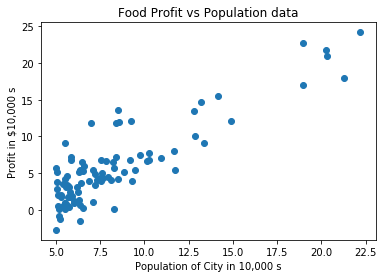

In [5]:
# Visualize data

plt.scatter(X, Y)
plt.ylabel('Profit in $10,000 s')
plt.xlabel('Population of City in 10,000 s')
plt.title("Food Profit vs Population data")
plt.show()

In [6]:
# function to initialize weights

def initialize_with_zeros(dim):
    w = np.zeros((dim, 1))
    b = 0
    
    assert(w.shape == (dim, 1))
    
    return w, b

In [7]:
# Function to compute the squred error

def compute_cost(w, b, X, Y):
    
    m = X.shape[0]
    
    assert(X.shape[1] == w.shape[0])
    
    h = np.dot(X, w) + b
    
    cost = 1/(2*m) * np.sum(np.power((h - Y), 2))
    
    dw = 1/m * np.sum(np.multiply((h - Y), X))
    db = 1/m * np.sum(np.multiply((h - Y), 1))
    
    grads = {"dw": dw,
             "db": db}
    
    return cost, grads

In [8]:
def gradient_descent(w, b, X, Y, learning_rate=0.01, num_iteration=1500, print_cost=True):
    m = X.shape[0]
    
    costs = []
    
    for i in range(num_iteration):
        
        cost, grads = compute_cost(w, b, X, Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # Gradient Descent
        w = w - np.dot(learning_rate, dw)
        b = b - np.dot(learning_rate, db)
        
        if i % 100 == 0:
            costs.append(cost)
            
        if print_cost and i % 100 == 0:
            print("Cost after iteration {} is {}".format(i, cost))
            
    params = {
        "w" : w,
        "b" : b
    }
    
    return params, costs

In [9]:
def LR_model(X_train, Y_train, num_iteration=2000, learning_rate=0.01, print_cost=True):
    
    # initialize parameters with zero
    w, b = initialize_with_zeros(X_train.shape[1])
    
    # Optimize parametes with gradient descent
    params, costs = gradient_descent(w, b, X_train, Y_train, learning_rate, num_iteration, print_cost)
    
    # Retrieve parametes w and b
    w = params["w"]
    b = params["b"]
    
    return w, b, costs
    

In [18]:
w, b, costs = LR_model(X, Y, 1500)

Cost after iteration 0 is 30.79495785534583
Cost after iteration 100 is 4.62886302304601
Cost after iteration 200 is 4.2741304129104565
Cost after iteration 300 is 4.0270154000774525
Cost after iteration 400 is 3.854869316456553
Cost after iteration 500 is 3.7349483380980235
Cost after iteration 600 is 3.6514085865801413
Cost after iteration 700 is 3.5932128465253474
Cost after iteration 800 is 3.552672336181594
Cost after iteration 900 is 3.5244308707859417
Cost after iteration 1000 is 3.504757207062151
Cost after iteration 1100 is 3.491052073886718
Cost after iteration 1200 is 3.481504758348879
Cost after iteration 1300 is 3.4748538755874883
Cost after iteration 1400 is 3.47022071547767


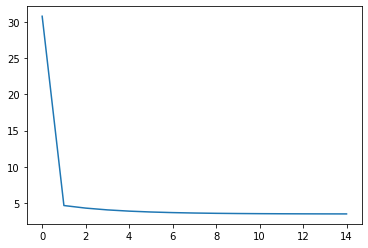

In [19]:
plt.plot(costs)

In [20]:
# Line of best fit

line = np.dot(X, w) + b

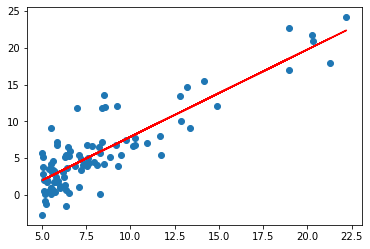

In [21]:
plt.scatter(X, Y)
plt.plot(X[:, 0], line, 'r')